# BIOS512 Assignment #2

📚 import the `TidyVerse` package. 📚

In [13]:
library('tidyverse')

Uncomment the code below and execute the following cell. This code provides a table for us called `ncaa_sports_spending`.

In [14]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-29/sports.csv'

ncaa_sports_spending = read_csv(data_url, col_types = cols()) |> 
    filter(sports == 'Basketball') |>
    pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
    select(year, institution_name, men_or_women, expenditure_usd) |>
    mutate(men_or_women = str_replace(men_or_women, 'exp_', ''))

ncaa_sports_spending |> head()

year,institution_name,men_or_women,expenditure_usd
<dbl>,<chr>,<chr>,<dbl>
2015,Alabama A & M University,men,817868
2015,Alabama A & M University,women,742460
2015,University of Alabama at Birmingham,men,4189826
2015,University of Alabama at Birmingham,women,1962579
2015,University of Alabama in Huntsville,men,612569
2015,University of Alabama in Huntsville,women,386007


**Compare the spending on men's versus women's basketball over time using a bar chart.**

Either use an *encoding* or *facet* to plot separate bars for men and women.

(**Hint** you can use `geom_col` with `x` and `y` encodings so the bar height reflects spending.)

Warning message:
“Removed 609 rows containing missing values or values outside the scale range
(`geom_col()`).”


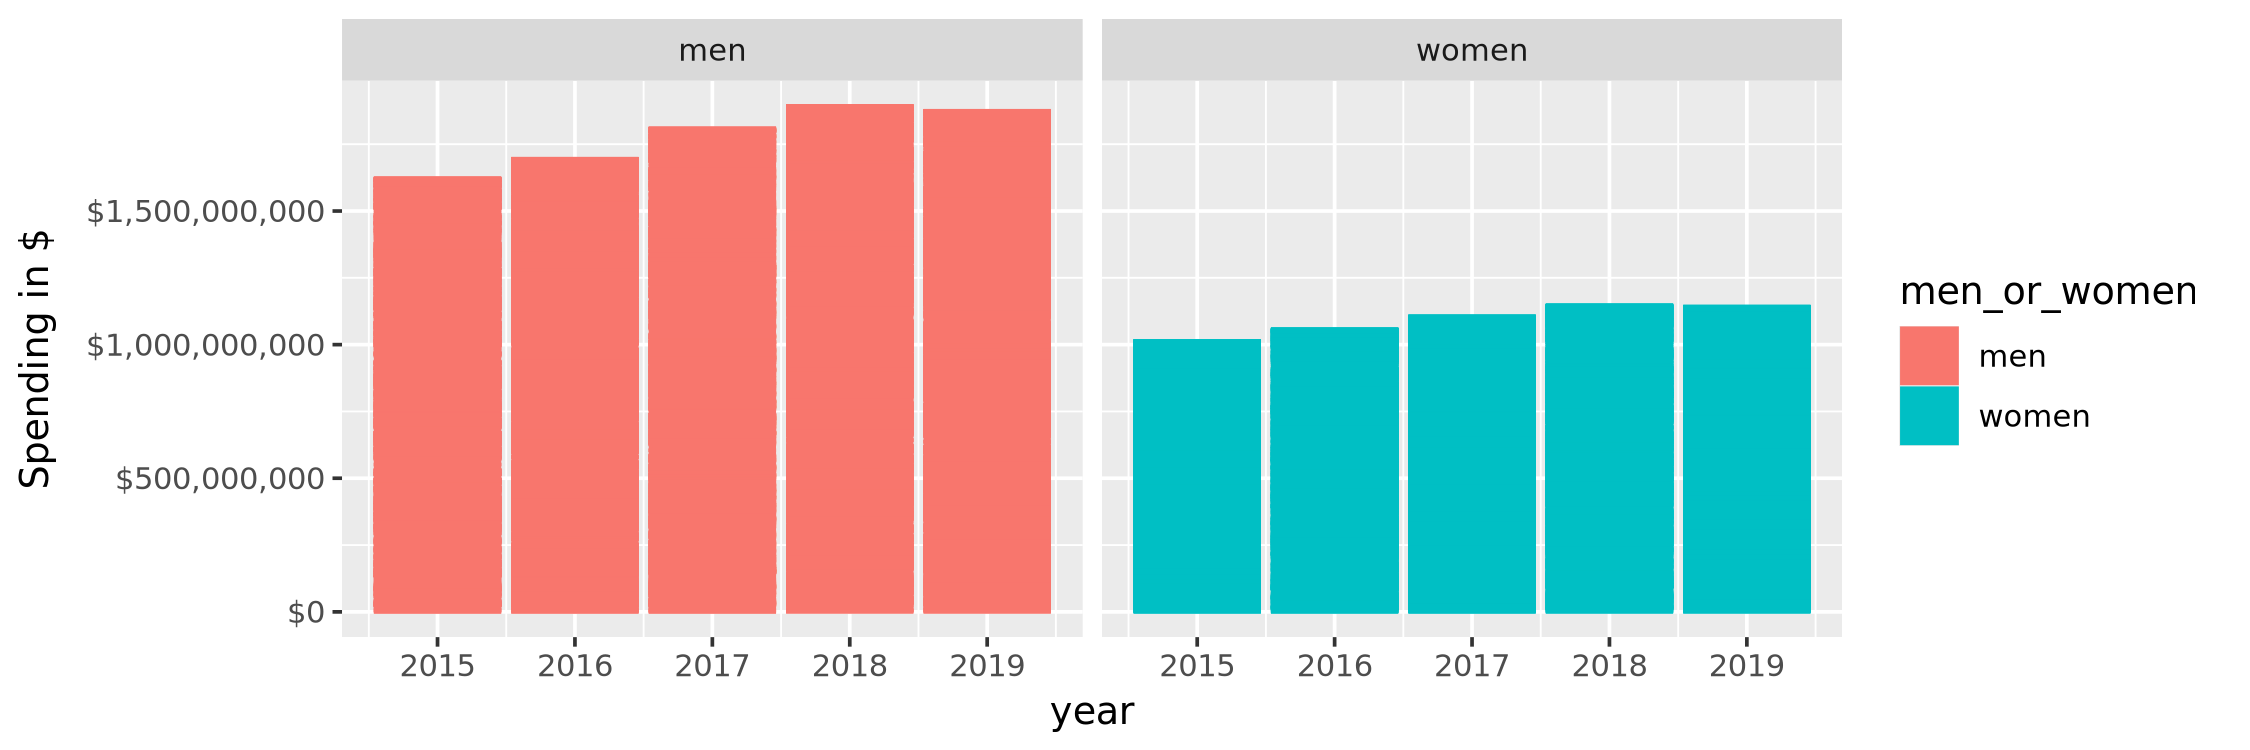

In [15]:
# bar chart code goes here

options(repr.plot.width = 9)

p = ggplot(ncaa_sports_spending, aes(x = year, y = expenditure_usd, color = men_or_women))

p = p + geom_col(aes(fill = men_or_women))

p = p + facet_wrap(~men_or_women, ncol = 2) 

p = p + scale_y_continuous(labels = scales::dollar_format()) + labs(y = 'Spending in $')

p

You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/2023/sports_spendig_chart.png). **Your chart does not need to look exactly like mine!** You may arrive at a different solution 🙂. 

To get the dollar signs in the axis labels I added this adujustment to my chart:

```r
scale_y_continuous(labels = scales::dollar_format())
```

**Visualize the same data but this time with a line chart. Make sure your lines are "grouped" according to the `men_or_women` column.**

*Note: use the `ncaa_sports_spending2` table for the line chart! 📈*

In [16]:
#uncomment and run to produce the line chart table

ncaa_sports_spending2 = ncaa_sports_spending |>
 group_by(year, men_or_women) |>
 summarize(expenditure_usd = sum(expenditure_usd, na.rm = TRUE))

ncaa_sports_spending2 |> head()

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,men_or_women,expenditure_usd
<dbl>,<chr>,<dbl>
2015,men,1622132863
2015,women,1013740678
2016,men,1695782608
2016,women,1057390299
2017,men,1809020416
2017,women,1105637602


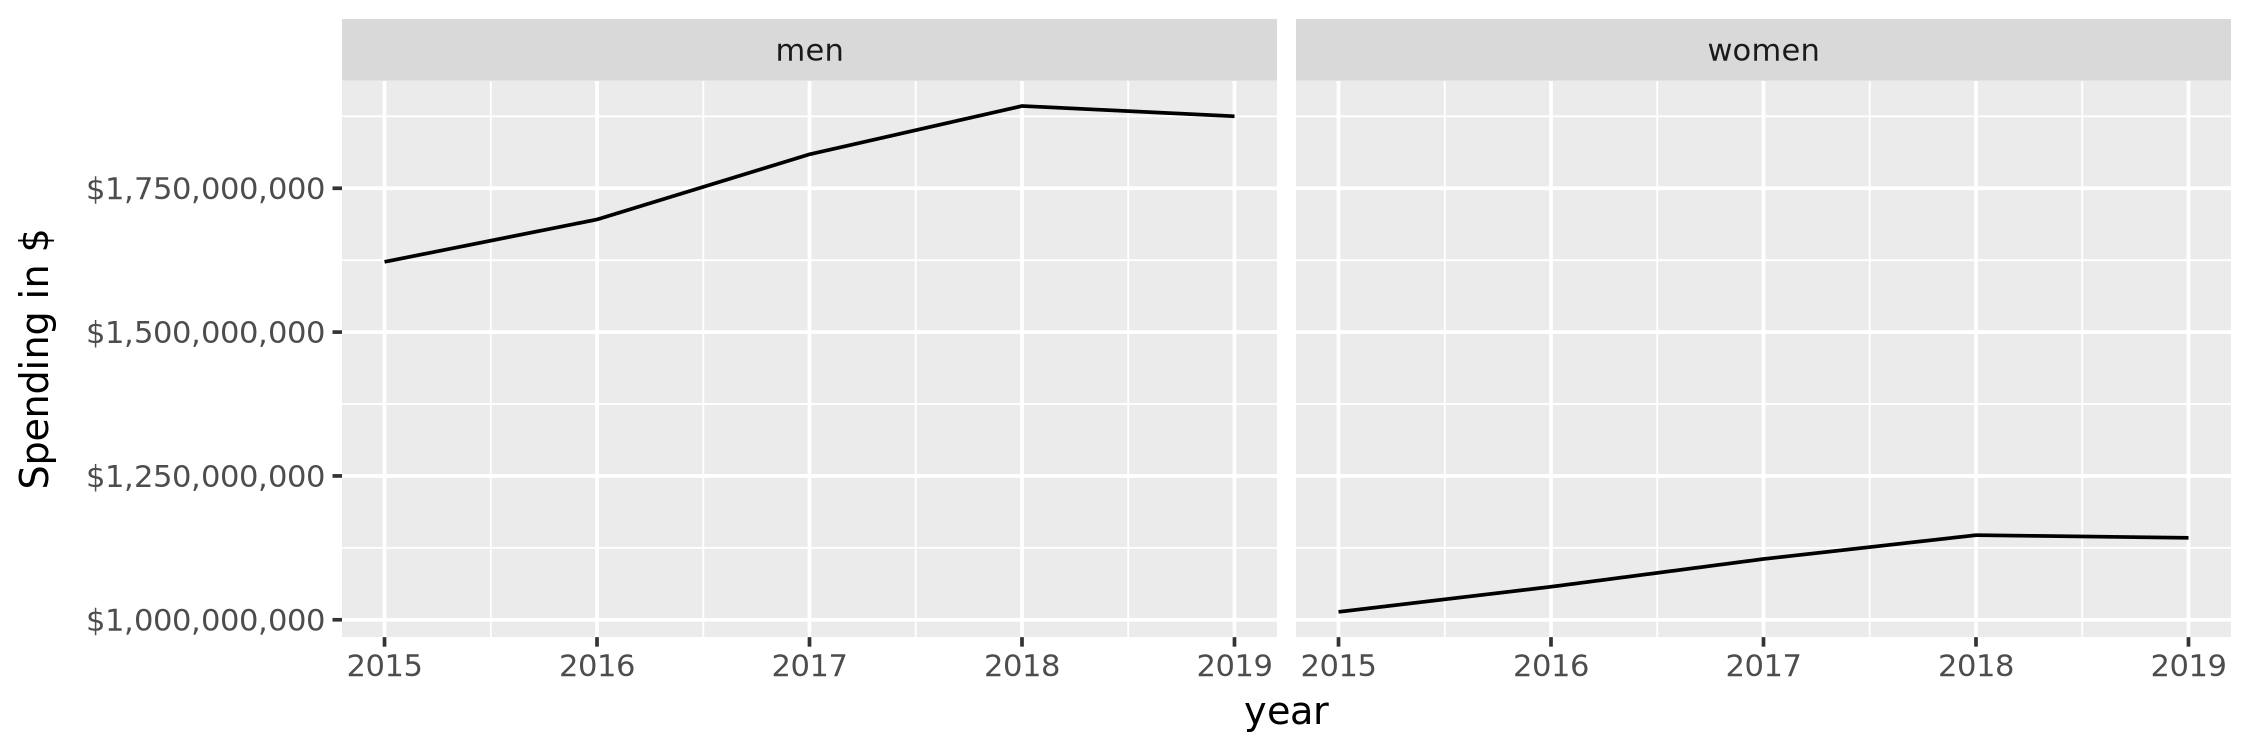

In [17]:
# line chart code goes here

p = ggplot(ncaa_sports_spending2, aes(x = year, y = expenditure_usd)) 

p = p + geom_line()

p = p + facet_wrap(~men_or_women, ncol = 2)

p = p + scale_y_continuous(labels = scales::dollar_format()) + labs(y = 'Spending in $')

p


Uncomment and execute the code below to get a table for just UNC sports spending in 2019 called `unc_sports_spending_2019`.

In [18]:
 unc_sports_spending_2019 = read_csv(data_url, col_types = cols()) |> 
     filter(institution_name == 'University of North Carolina at Chapel Hill', year == 2019) |>
     pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
     arrange(rev(men_or_women), expenditure_usd) |>
     mutate(sports = fct_inorder(sports)) |>
     select(year, institution_name, sports, men_or_women, expenditure_usd) |>
     mutate(men_or_women = str_replace(men_or_women, 'exp_', '')) |>
     filter(!is.na(expenditure_usd))

 unc_sports_spending_2019 |> head()

year,institution_name,sports,men_or_women,expenditure_usd
<dbl>,<chr>,<fct>,<chr>,<dbl>
2019,University of North Carolina at Chapel Hill,Fencing,women,212291
2019,University of North Carolina at Chapel Hill,Golf,women,729939
2019,University of North Carolina at Chapel Hill,Rowing,women,745952
2019,University of North Carolina at Chapel Hill,Gymnastics,women,1022938
2019,University of North Carolina at Chapel Hill,Tennis,women,1064746
2019,University of North Carolina at Chapel Hill,Swimming and Diving,women,1255235


Make a bar chart that compares spending across all sports for men versus women at UNC in 2019.

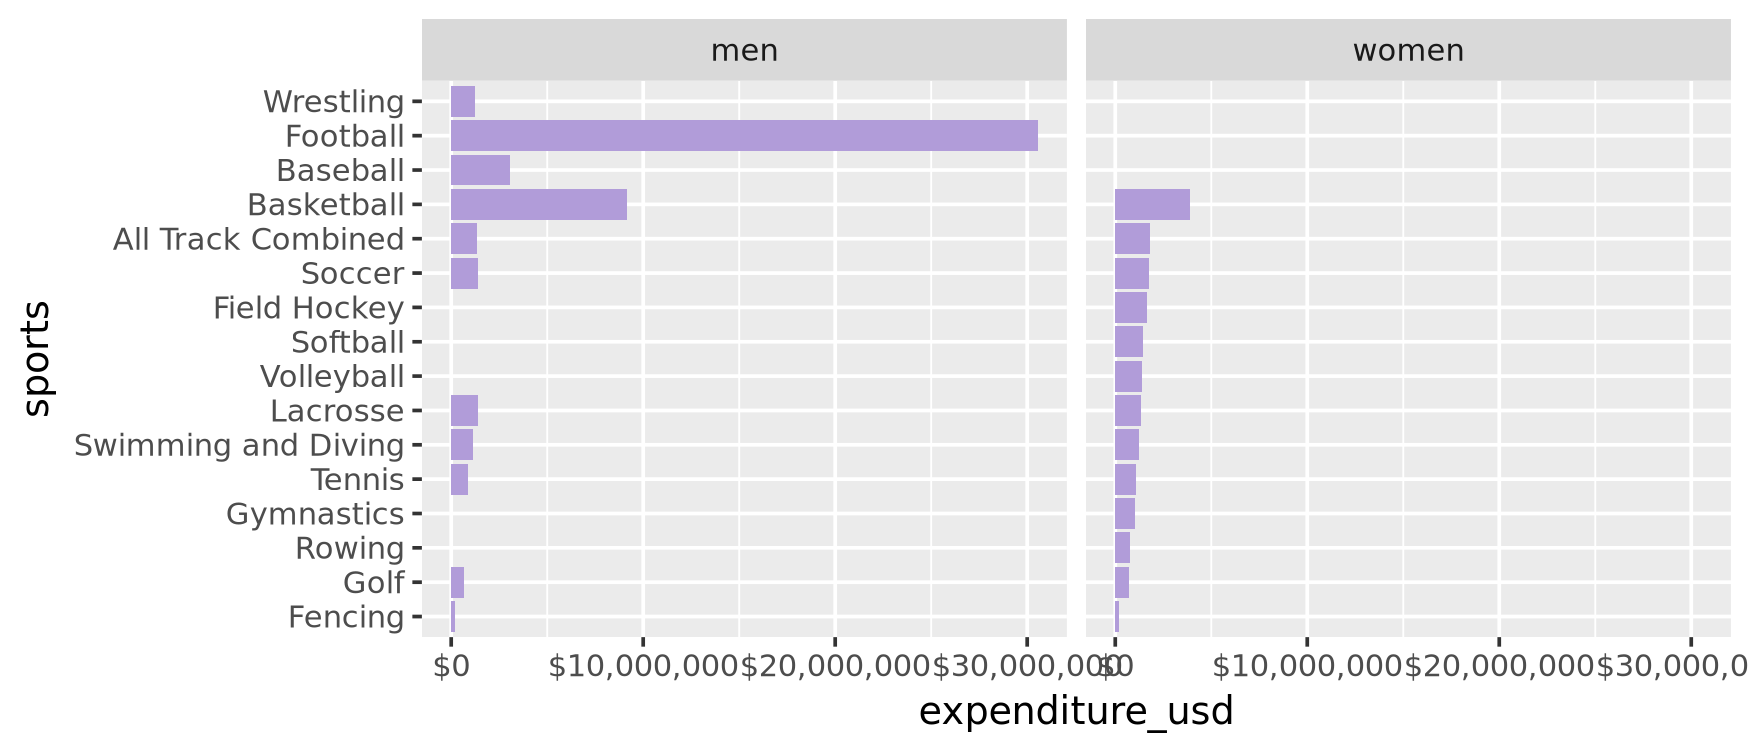

In [19]:
# bar chart code goes here
options(repr.plot.width = 7)

p = ggplot(unc_sports_spending_2019, aes(y = sports, x = expenditure_usd))

p = p + geom_col(fill='#b19cd9')

p = p + facet_wrap(~men_or_women, ncol = 2) 
p = p + scale_x_continuous(labels = scales::dollar_format())

p

You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/2023/unc_sports_spending.png). **Your chart does not need to look exactly like mine!**

To get the fancy dollar labels I had to do a couple things:

First my `weight` encoding was like this:
```r
weight = expenditure_usd / 1e6
```

Second, I added this to my chart adjust how my axis labels were presented:
```r
scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending')
```

**BONUS** 
Can you make sense of the code above? What does the `labs` function do for instance?

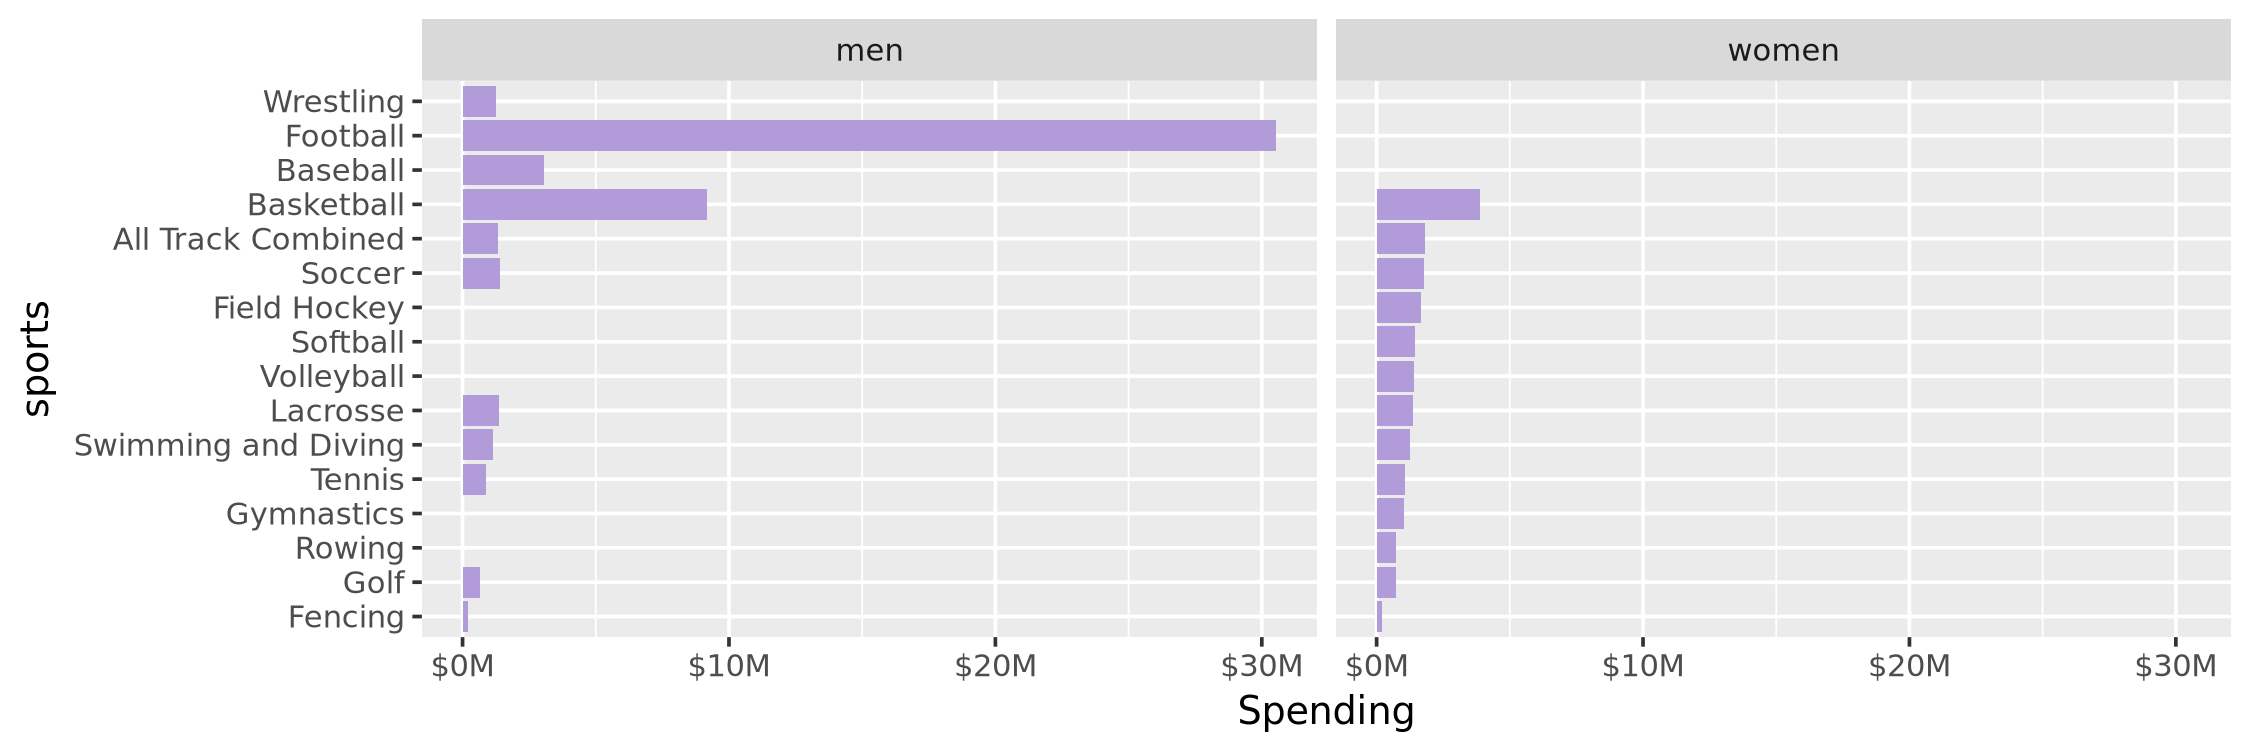

In [20]:
options(repr.plot.width = 9)

unc_sports_spending_2019_weight = unc_sports_spending_2019 %>% 
    mutate(weight = expenditure_usd / 1e6)

p = ggplot(unc_sports_spending_2019_weight, aes(y = sports, x = weight))

p = p + geom_col(fill='#b19cd9')

p = p + facet_wrap(~men_or_women, ncol = 2) 

p = p + scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending')

p

**Answering the following question:**

***Can you make sense of the code above? What does the `labs` function do for instance?***

`labs` is used to change the specified axis title from the default column name to a preferred title. In this case, the x-axis title is changed from expenditure_usd to 'Spending'

 ```r
weight = expenditure_usd / 1e6
```
The above line of code divides spending values by 1 million so the x-axis labels can be written with millions of dollars as units.


```r
scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending')
```

The above line of code modifies the x-axis label values to have a dollar sign in front of them and an 'M' at the end to indicate millions